# Data

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load data
X, y = load_wine(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 546)

# Standardize features
scaler = StandardScaler().set_output(transform = "pandas")
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Preview the raw data
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Creating a Basic KNN Classifier

Text(0.5, 1.0, 'KNN (k = 5)')

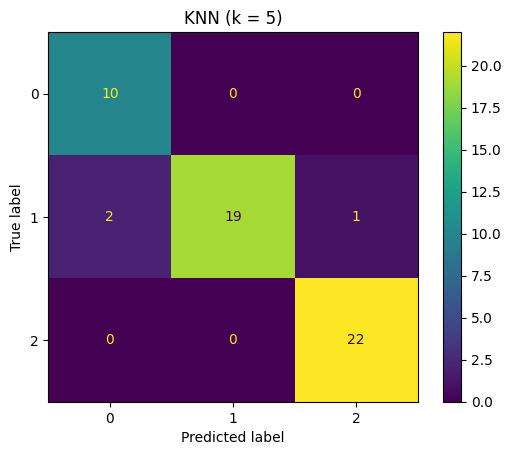

In [ ]:
# Train the model
knn = KNeighborsClassifier() # Defaults to k = 5
knn.fit(X_train_scaled, y_train)

# Generate predictions on the test set
y_pred = knn.predict(X_test_scaled)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred)).plot()
plt.title("KNN (k = 5)")

# Distance Metrics

Text(0.5, 1.0, 'Manhattan Distance KNN (k = 5)')

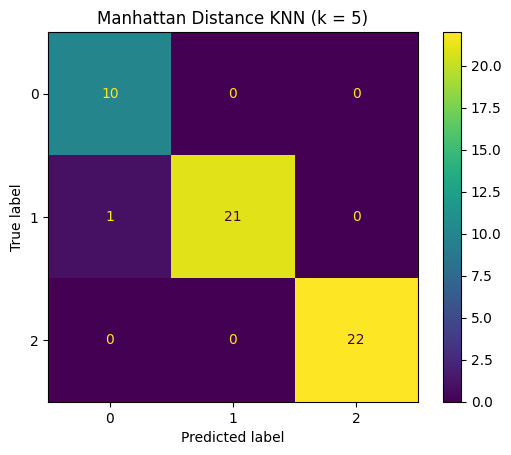

In [ ]:
# Train the model
manhattan = KNeighborsClassifier(p = 1)
manhattan.fit(X_train_scaled, y_train)

# Generate predictions on the test set
y_pred_manhattan = manhattan.predict(X_test_scaled)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_manhattan)).plot()
plt.title("Manhattan Distance KNN (k = 5)")

Text(0.5, 1.0, 'Weighted KNN (k = 5)')

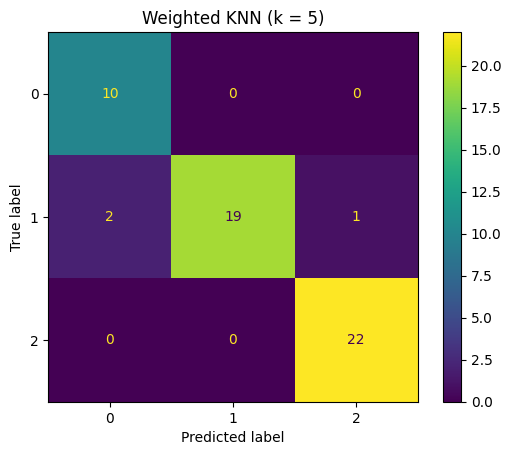

In [ ]:
# Train the model
knn_weighted = KNeighborsClassifier(weights = "distance")
knn_weighted.fit(X_train_scaled, y_train)

# Generate predictions on the test set
y_pred_weighted = knn_weighted.predict(X_test_scaled)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_weighted)).plot()
plt.title("Weighted KNN (k = 5)")

# Dimensionality Reduction


Text(0.5, 1.0, 'PCA, KNN (k = 5)')

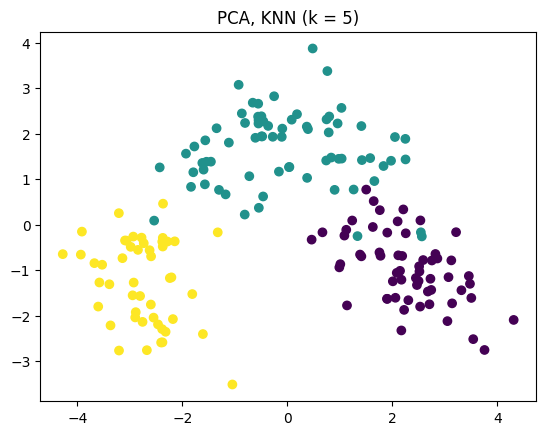

<Figure size 640x480 with 0 Axes>

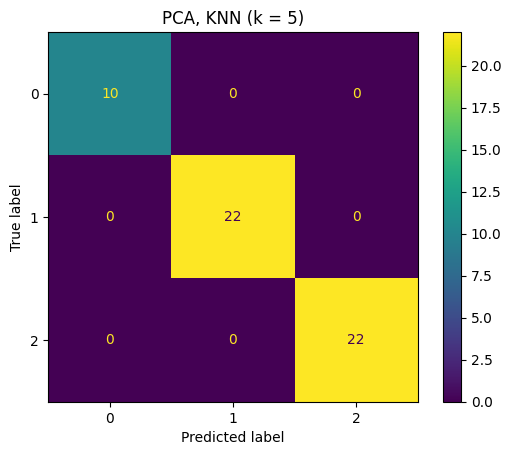

In [ ]:
# Create and fit PCA model
pca = PCA(n_components = 2, random_state = 546)
pca.fit(X_scaled)

# Plot reduced dimensions
X_scaled_pca = pca.transform(X_scaled)
plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c = y)
plt.title("PCA, KNN (k = 5)")

# Implement KNN with PCA dimensionality reduction
knn_pca = KNeighborsClassifier()
knn_pca.fit(pca.transform(X_train_scaled), y_train)

# Generate predictions on the test set
y_pred_pca = knn_pca.predict(pca.transform(X_test_scaled))
plt.figure()
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_pca)).plot()
plt.title("PCA, KNN (k = 5)")

Text(0.5, 1.0, 'LDA, KNN (k = 5)')

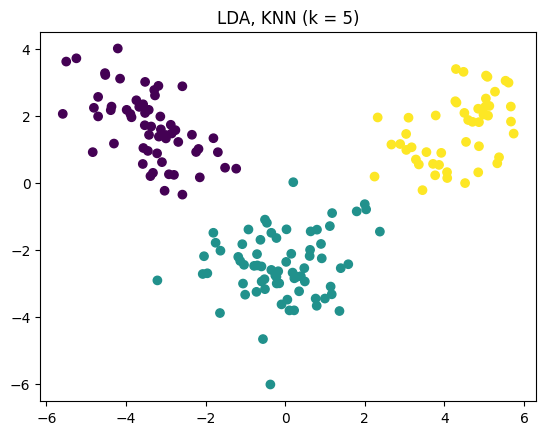

<Figure size 640x480 with 0 Axes>

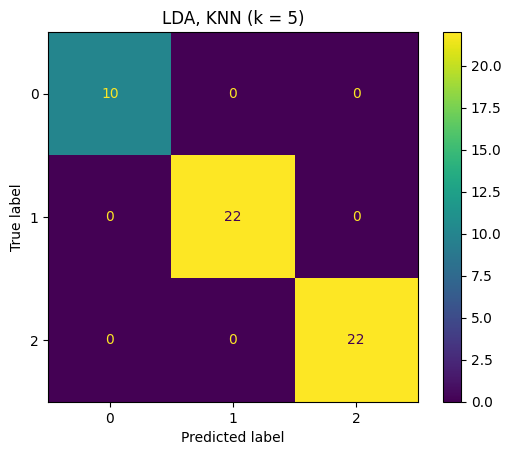

In [ ]:
# Create and fit LDA model
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(X_scaled, y) # Note: LDA needs the class values

# Plot reduced dimensions
X_scaled_lda = lda.transform(X_scaled)
plt.scatter(X_scaled_lda[:, 0], X_scaled_lda[:, 1], c = y)
plt.title("LDA, KNN (k = 5)")

# Implement KNN with LDA dimensionality reduction
knn_lda = KNeighborsClassifier()
knn_lda.fit(lda.transform(X_train_scaled), y_train)

# Generate predictions on the test set
y_pred_lda = knn_lda.predict(lda.transform(X_test_scaled))
plt.figure()
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_lda)).plot()
plt.title("LDA, KNN (k = 5)")

Text(0.5, 1.0, 'NCA, KNN (k = 5)')

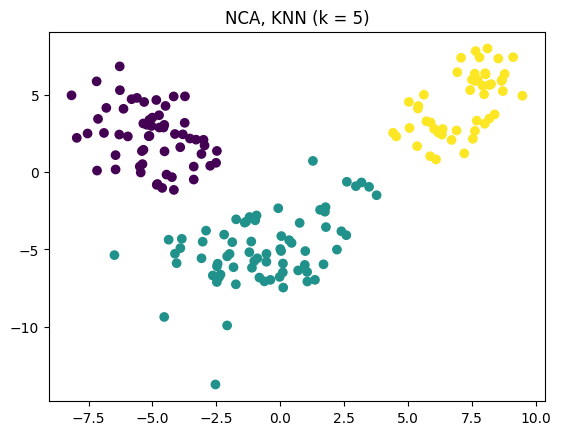

<Figure size 640x480 with 0 Axes>

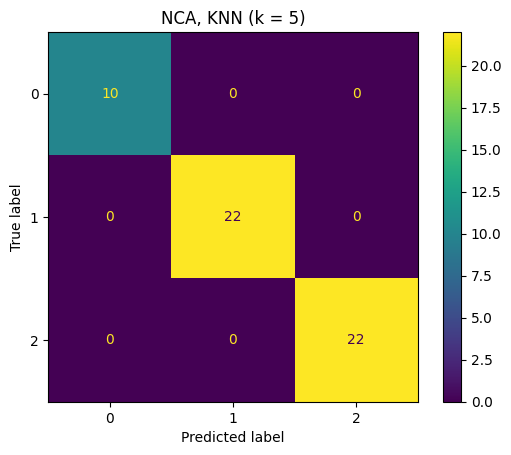

In [ ]:
# Create and fit NCA model
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 546)
nca.fit(X_scaled, y) # Note: NCA needs the class values

# Plot reduced dimensions
X_scaled_nca = nca.transform(X_scaled)
plt.scatter(X_scaled_nca[:, 0], X_scaled_nca[:, 1], c = y)
plt.title("NCA, KNN (k = 5)")

# Implement KNN with NCA dimensionality reduction
knn_nca = KNeighborsClassifier()
knn_nca.fit(nca.transform(X_train_scaled), y_train)

# Generate predictions on the test set
y_pred_nca = knn_nca.predict(nca.transform(X_test_scaled))
plt.figure()
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_nca)).plot()
plt.title("NCA, KNN (k = 5)")

# Feature Scaling

Let's start by looking at the raw data and the scaled data.

In [ ]:
X.describe().round(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [ ]:
X_scaled.describe().round(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.43,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78
50%,0.06,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76
max,2.26,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97


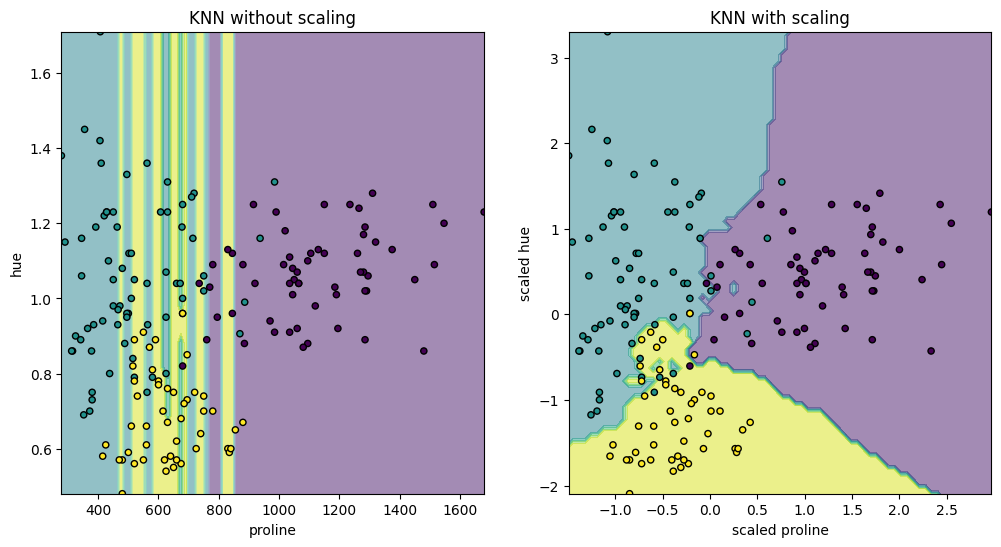

In [ ]:
# Extract proline and hue from data
X_plot = X[["proline", "hue"]]
X_plot_scaled = scaler.fit_transform(X_plot)

# Wrapper function
def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))
    return disp.ax_

# Create plots of decision boundaries
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

fit_and_plot_model(X_plot, y, knn, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y, knn, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_ = ax2.set_title("KNN with scaling")